In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

In [2]:
import seaborn as sns

sns.set(color_codes =  True)
sns.set(rc = {'figure.figsize' : (5,5)})

In [3]:
from scipy.stats import uniform

In [4]:
n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size = n, loc = start, scale = width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

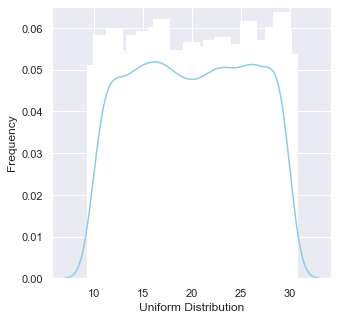

In [5]:
ax = sns.distplot(data_uniform,
                 bins = 100,
                 kde = True,
                 color = 'skyblue',
                 hist_kws = {"linewidth" : 15, 'alpha' : 1})

ax.set(xlabel = 'Uniform Distribution', ylabel = 'Frequency')

In [6]:
from scipy.stats import norm

data_normal = norm.rvs(size = 10000, loc=0, scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distributiion')]

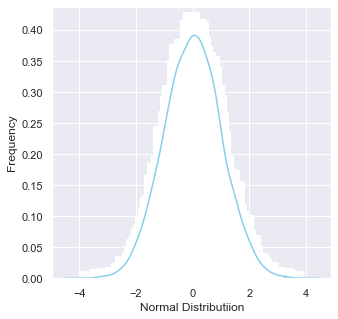

In [7]:
ax = sns.distplot(data_normal,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Normal Distributiion', ylabel='Frequency')

In [9]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distributiion')]

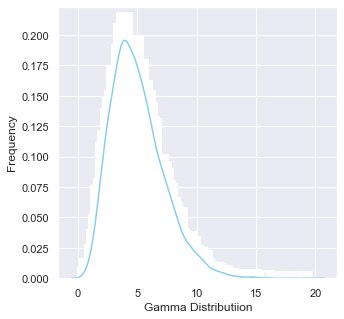

In [13]:
ax = sns.distplot(data_gamma,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Gamma Distributiion', ylabel='Frequency')

In [14]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distributiion')]

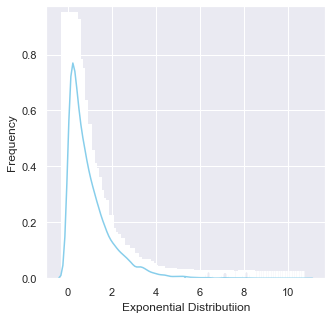

In [15]:
ax = sns.distplot(data_expon,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Exponential Distributiion', ylabel='Frequency')

In [18]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distributiion')]

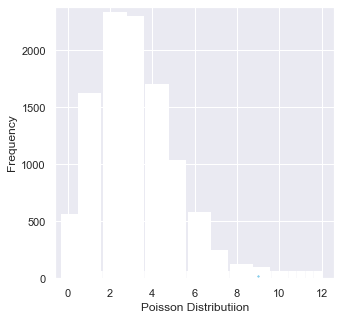

In [19]:
ax = sns.distplot(data_poisson,
                 bins=30,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Poisson Distributiion', ylabel='Frequency')

In [20]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distributiion')]

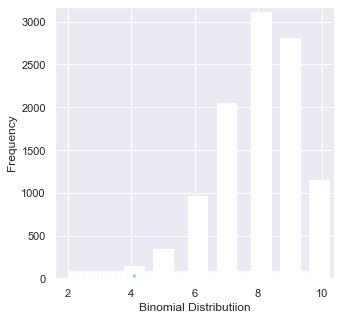

In [21]:
ax = sns.distplot(data_binom,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Binomial Distributiion', ylabel='Frequency')

In [22]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distributiion')]

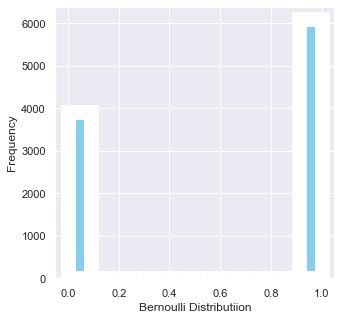

In [23]:
ax = sns.distplot(data_bern,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Bernoulli Distributiion', ylabel='Frequency')

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('Heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
df['Sex1'] = df.sex.replace({1: "Male", 0: "Female"})

In [26]:
dx = df[["target", "Sex1"]].dropna()

In [27]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [28]:
p_fm = 226/(86_226)

p_fm

0.002621019182149236

In [31]:
n = 86+226

n

312

In [32]:
se_female = np.sqrt(p_fm * (1- p_fm) / n)

se_female

0.0028945956720195817

In [33]:
z_score = 1.96

lcb = p_fm - z_score * se_female
ucb = p_fm + z_score * se_female

lcb, ucb

(-0.0030523883350091446, 0.008294426699307616)

In [34]:
import statsmodels.api as sm

sm.stats.proportion_confint(n * p_fm, n)

(0.0, 0.008294322449113132)

In [36]:
df.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [39]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96

In [40]:
se = sd / np.sqrt(n)

In [41]:
lcb = mean_fe - z * se
ucb = mean_fe + z * se

lcb, ucb

(254.3039731821066, 268.59602681789335)

In [42]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc = {'figure.figsize': (13, 7.5)})
sns.set_context('talk')

In [43]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, 
                                  normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

In [44]:
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


Text(0.5, 1.015, 'Distribution of Mass of People in US')

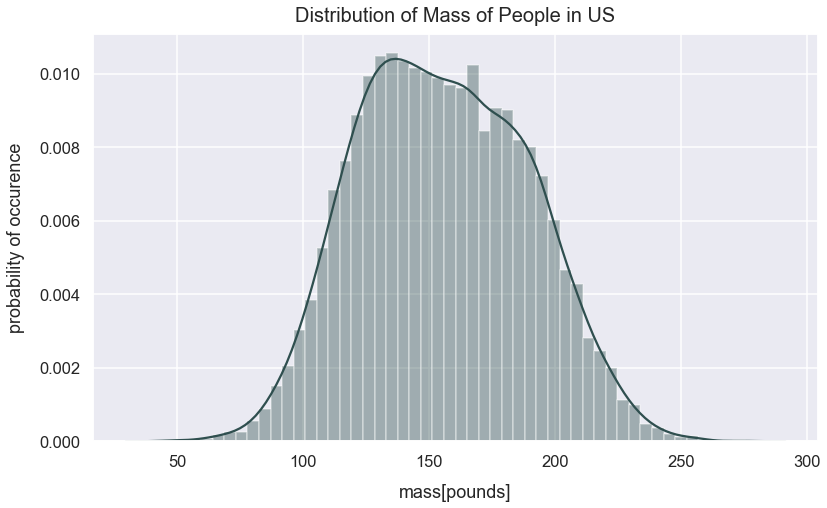

In [45]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color='darkslategrey')
plt.xlabel("mass[pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in US", y=1.015, fontsize=20)

In [47]:
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

In [49]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()

pop_std_dev_mass

33.585190883958624

In [50]:
sample_means = []
n = 25
for sample in range(0,300):
    sample_values = np.random.choice(a = df_ppl_mass['us_people_mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(0.5, 1.015, "Distribution of Sample Means ($n=25$) of People's Mass in Pounds")

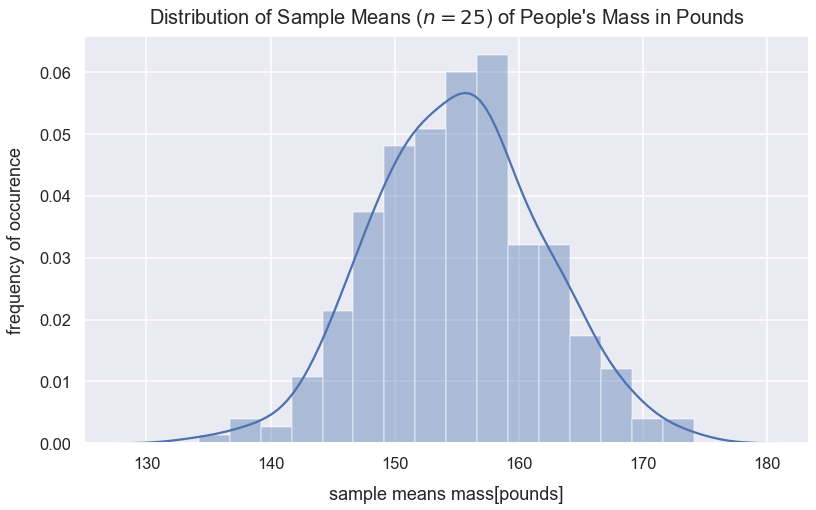

In [51]:
sns.distplot(sample_means)
plt.xlabel("sample means mass[pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)

In [52]:
mean_of_sample_means = np.median(sample_means)

mean_of_sample_means

155.3008268518431

In [53]:
median_of_sample_means = np.mean(sample_means)

median_of_sample_means

155.12418330193915

In [54]:
pop_mean_mass

155.4232805942338

In [55]:
std_dev_of_sample_means = np.std(sample_means)

std_dev_of_sample_means

6.734407481483423

In [56]:
standard_error = pop_std_dev_mass/np.sqrt(n)

standard_error

6.717038176791725

In [57]:
std_dev_of_sample_means

6.734407481483423

In [58]:
tail = 1 - stats.norm.cdf(1.96)

tail

0.024997895148220484

In [59]:
1 - (tail * 2)

0.950004209703559

In [60]:
lower_95_perc_bound = mean_of_sample_means - 1.96 * standard_error

lower_95_perc_bound

142.13543202533134

In [61]:
upper_95_perc_bound = mean_of_sample_means + 1.96 * standard_error

upper_95_perc_bound

168.46622167835488

Text(0, 0.5, 'frequency of occurence')

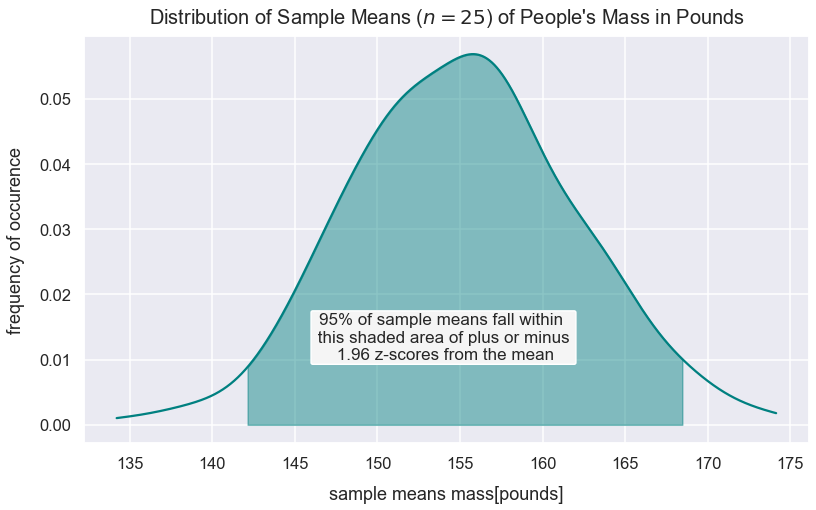

In [63]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)

plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)

plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)

plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, s="95% of sample means fall within \n this shaded area of plus or minus \n 1.96 z-scores from the mean",
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad =0.1"))

plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y = 1.015, fontsize = 20)
plt.xlabel("sample means mass[pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

In [64]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
n = 1018
pnull = .52
phat = .56

In [66]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative = 'larger')

(2.571067795759113, 0.005069273865860533)

In [67]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"

da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [68]:
females = da[da['RIAGENDR'] == 2]
males = da[da['RIAGENDR'] == 1]

In [69]:
n1 = len(females)
mu1 = females['BMXBMI'].mean()
sd1 = females['BMXBMI'].std()

n1, mu1, sd1

(2976, 29.939945652173996, 7.75331880954568)

In [70]:
n2 = len(males)
mu1 = males['BMXBMI'].mean()
sd1 = males['BMXBMI'].std()

n1, mu1, sd1

(2976, 28.778072111846985, 6.252567616801485)

In [71]:
sm.stats.ztest(females['BMXBMI'].dropna(), males['BMXBMI'].dropna(), alternative = 'two-sided')

(6.1755933531383205, 6.591544431126401e-10)

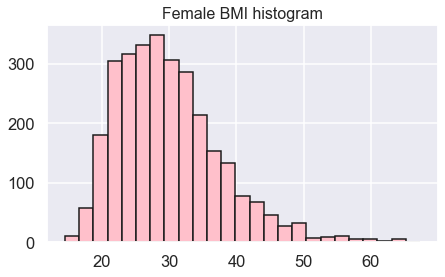

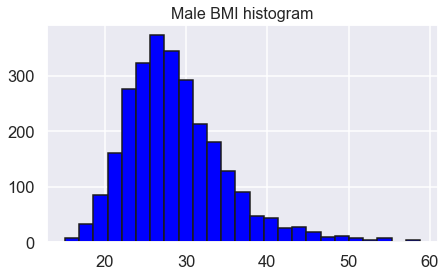

In [74]:
plt.figure(figsize = (7,4))
plt.title("Female BMI histogram", fontsize=16)
plt.hist(females['BMXBMI'].dropna(), edgecolor='k', color='pink', bins=25)

plt.show()

plt.figure(figsize = (7,4))
plt.title("Male BMI histogram", fontsize=16)
plt.hist(males['BMXBMI'].dropna(), edgecolor='k', color='blue', bins=25)

plt.show()

In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist
df = pd.read_csv('Heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [82]:
p0 = 0.42

In [87]:
p_us = len(df[df['target'] == '1'])/len(df)

p_us

0.0

In [88]:
se = np.sqrt(p0 * (1 - p0) / len(df))

se

0.015416177755376521

In [89]:
test_stat = (p_us - p0) / se

test_stat

-27.244107240105055

In [91]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

pvalue

1.9517162972676465e-163

In [92]:
from scipy.stats import shapiro

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

stat, p = shapiro(data)

print('stat=%.3f, p=%.3f' % (stat,p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


In [93]:
from scipy.stats import normaltest

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

stat, p = normaltest(data)

print('stat=%.3f, p=%.3f' % (stat,p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


C:\Users\nadia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [96]:
from scipy.stats import anderson

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

result = anderson(data)

print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [97]:
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Indenpendent')
else:
    print('Probably Dependent')

stat=0.688, p=0.028
Probably Dependent


In [98]:
from scipy.stats import spearmanr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Indenpendent')
else:
    print('Probably Dependent')

stat=0.855, p=0.002
Probably Dependent


In [99]:
from scipy.stats import kendalltau

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Indenpendent')
else:
    print('Probably Dependent')

stat=0.733, p=0.002
Probably Dependent


In [103]:
from scipy.stats import chi2_contingency

table = [[10,20,30],[6,9,17]]
stat, p, dof, expected = chi2_contingency(table)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Indenpendent')
else:
    print('Probably Dependent')

stat=0.272, p=0.873
Probably Indenpendent


In [104]:
from statsmodels.tsa.stattools import adfuller

data = [0,1,2,3,4,5,6,7,8,9]
stat, p, lags, obs, crit, t = adfuller(data)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=1.496, p=0.998
Probably not Stationary


In [108]:
from statsmodels.tsa.stattools import kpss

data = [0,1,2,3,4,5,6,7,8,9]
stat, p, lags, crit = kpss(data)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


In [109]:
from scipy.stats import ttest_ind

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distributions')
else:
    print('Probably different distribution')

stat=0.515, p=0.613
Probably the same distributions


In [110]:
from scipy.stats import mannwhitneyu

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = mannwhitneyu(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distributions')
else:
    print('Probably different distribution')

stat=45.000, p=0.367
Probably the same distributions


In [111]:
from scipy.stats import wilcoxon

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = wilcoxon(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distributions')
else:
    print('Probably different distributions')

stat=21.000, p=0.507
Probably the same distributions


In [112]:
from scipy.stats import kruskal

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = kruskal(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distributions')
else:
    print('Probably different distributions')

stat=0.143, p=0.705
Probably the same distributions


In [115]:
from scipy.stats import friedmanchisquare

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.139, 0.269, -0.870, -1.204]

stat, p = friedmanchisquare(data1, data2, data3)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the same distributions')
else:
    print('Probably different distributions')

stat=1.400, p=0.497
Probably the same distributions
